In [1]:
library(wooldridge)
library(stargazer)
library(knitr)


Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



In [2]:
pacman::p_load(wooldridge,stargazer,broom,tidyverse,ggplot2,
               dplyr,tidyr,moderndive,jtools,sjPlot,dotwhisker,FSA)

# Example 5.1: Housing Prices and Distance From an Incinerator

In [14]:
help(hprice3)

In [3]:
data("hprice3")

In [13]:
head(hprice3)

year,age,agesq,nbh,cbd,inst,linst,price,rooms,area,land,baths,dist,ldist,lprice,y81,larea,lland,linstsq
1978,48,2304,4,3000,1000,6.9078,60000,7,1660,4578,1,10700,9.277999,11.00210,0,7.414573,8.429017,47.71770
1978,83,6889,4,4000,1000,6.9078,40000,6,2612,8370,2,11000,9.305651,10.59663,0,7.867871,9.032409,47.71770
1978,58,3364,4,4000,1000,6.9078,34000,6,1144,5000,1,11500,9.350102,10.43412,0,7.042286,8.517193,47.71770
1978,11,121,4,4000,1000,6.9078,63900,5,1136,10000,1,11900,9.384294,11.06507,0,7.035269,9.210340,47.71770
1978,48,2304,4,4000,2000,7.6009,44000,5,1868,10000,1,12100,9.400961,10.69195,0,7.532624,9.210340,57.77368
1978,78,6084,4,3000,2000,7.6009,46000,6,1780,9500,3,10000,9.210340,10.73640,0,7.484369,9.159047,57.77368


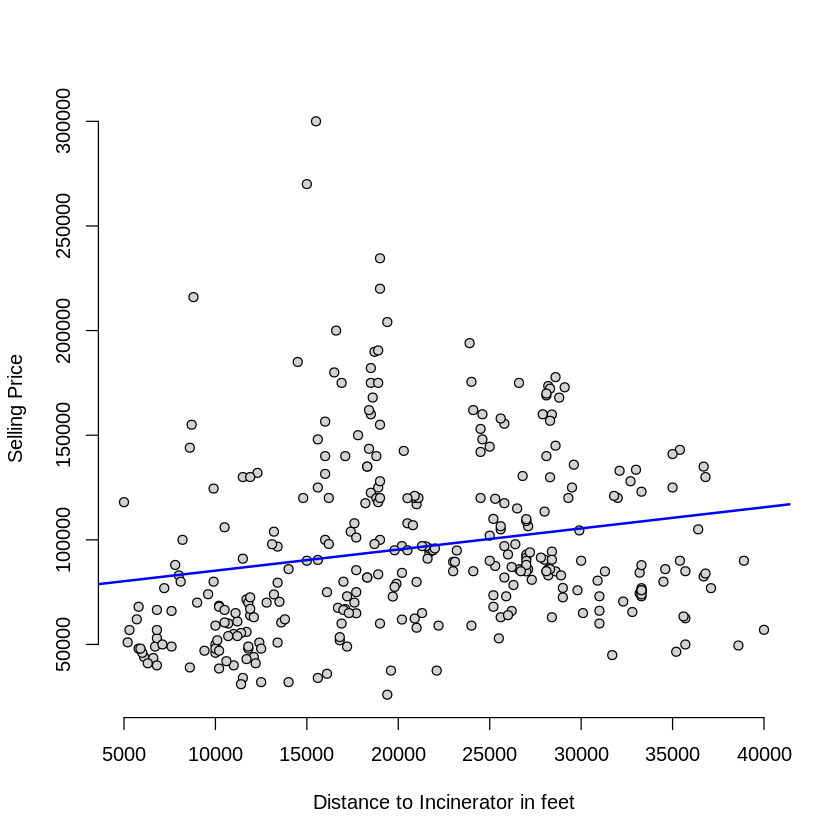

In [4]:
par(mfrow=c(1,1))

plot(y = hprice3$price, x = hprice3$dist, main = " ", xlab = "Distance to Incinerator in feet", ylab = "Selling Price",  frame = FALSE, pch = 21, bg = "lightgrey")
abline(lm(price ~ dist, data=hprice3), col = "blue", lwd=2)

Next, model the $log($price$)$ against the $log($dist$)$ to estimate the percentage relationship between the two.

$$price = \alpha + \beta_1 dist$$

price_dist_model <- lm(lprice ~ ldist, data = hprice3)
Create another model that controls for "quality" variables, such as square footage area per house.

$$price = \alpha + \beta_1 dist + \beta_2 area$$

price_area_model <- lm(lprice ~ ldist + larea, data = hprice3)
Compare the coefficients of both models. Notice that adding area improves the quality of the model, but also reduces the coefficient size of dist.

In [5]:
price_dist_model <- lm(lprice ~ ldist, data = hprice3)

In [6]:
price_area_model <- lm(lprice ~ ldist + larea, data = hprice3)

In [7]:
summary(price_dist_model)


Call:
lm(formula = lprice ~ ldist, data = hprice3)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.22356 -0.28076 -0.05527  0.27992  1.29332 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.25750    0.47383  17.427  < 2e-16 ***
ldist        0.31722    0.04811   6.594 1.78e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4117 on 319 degrees of freedom
Multiple R-squared:  0.1199,	Adjusted R-squared:  0.1172 
F-statistic: 43.48 on 1 and 319 DF,  p-value: 1.779e-10


In [8]:
summ(price_dist_model)

MODEL INFO:
Observations: 321
Dependent Variable: lprice
Type: OLS linear regression 

MODEL FIT:
F(1,319) = 43.48, p = 0.00
R² = 0.12
Adj. R² = 0.12 

Standard errors: OLS
-----------------------------------------------
                    Est.   S.E.   t val.      p
----------------- ------ ------ -------- ------
(Intercept)         8.26   0.47    17.43   0.00
ldist               0.32   0.05     6.59   0.00
-----------------------------------------------

In [9]:

summary(price_area_model)


Call:
lm(formula = lprice ~ ldist + larea, data = hprice3)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.23380 -0.18820 -0.01723  0.21751  0.86039 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.49394    0.49065   7.121 7.18e-12 ***
ldist        0.19623    0.03816   5.142 4.77e-07 ***
larea        0.78368    0.05358  14.625  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3188 on 318 degrees of freedom
Multiple R-squared:  0.4738,	Adjusted R-squared:  0.4705 
F-statistic: 143.2 on 2 and 318 DF,  p-value: < 2.2e-16


In [10]:
summ(price_area_model)

MODEL INFO:
Observations: 321
Dependent Variable: lprice
Type: OLS linear regression 

MODEL FIT:
F(2,318) = 143.19, p = 0.00
R² = 0.47
Adj. R² = 0.47 

Standard errors: OLS
-----------------------------------------------
                    Est.   S.E.   t val.      p
----------------- ------ ------ -------- ------
(Intercept)         3.49   0.49     7.12   0.00
ldist               0.20   0.04     5.14   0.00
larea               0.78   0.05    14.63   0.00
-----------------------------------------------

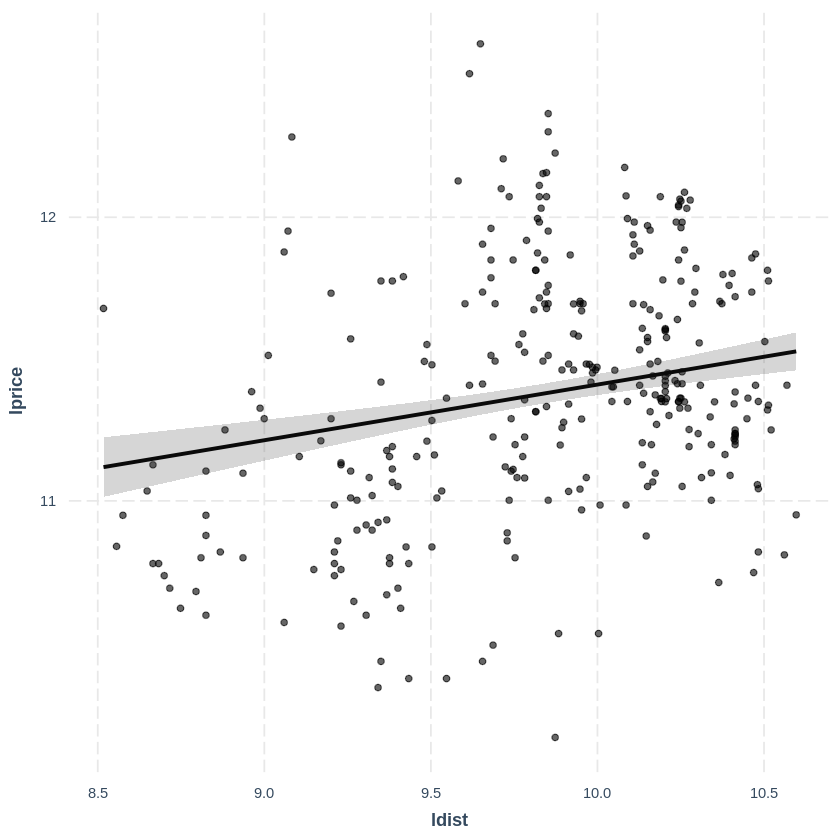

In [12]:
effect_plot(price_area_model, pred = ldist, interval = TRUE, plot.points = TRUE)

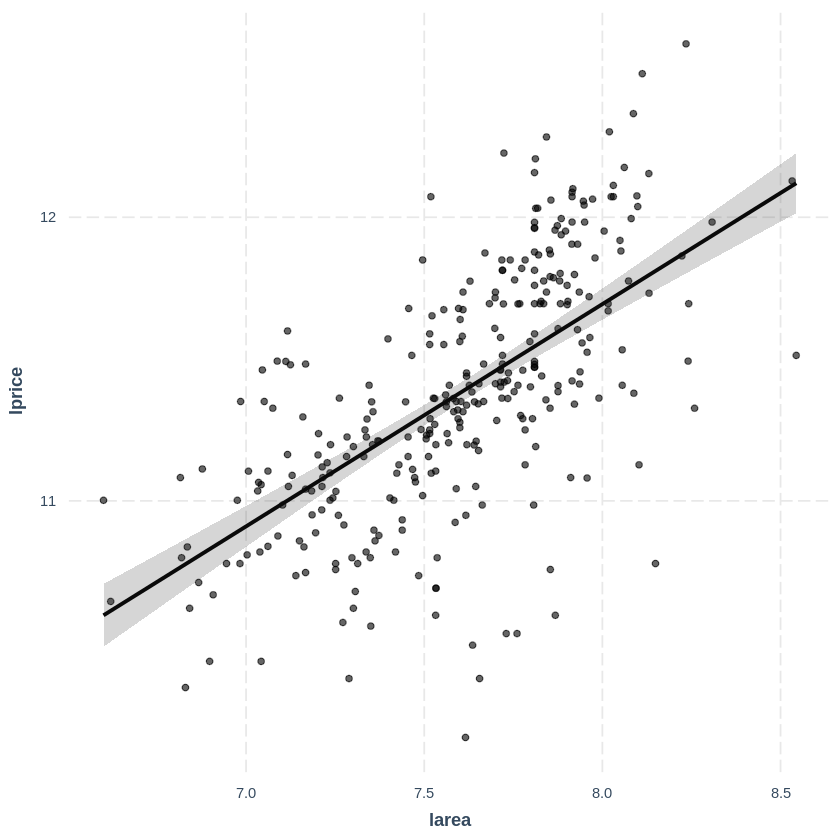

In [10]:
effect_plot(price_area_model, pred = larea, interval = TRUE, plot.points = TRUE)

In [11]:
stargazer(type = "text",price_dist_model, price_area_model,  single.row = TRUE, header = FALSE, digits=5)


                                    Dependent variable:                 
                    ----------------------------------------------------
                                           lprice                       
                               (1)                       (2)            
------------------------------------------------------------------------
ldist                 0.31722*** (0.04811)       0.19623*** (0.03816)   
larea                                            0.78368*** (0.05358)   
Constant              8.25750*** (0.47383)       3.49394*** (0.49065)   
------------------------------------------------------------------------
Observations                   321                       321            
R2                           0.11994                   0.47385          
Adjusted R2                  0.11718                   0.47054          
Residual Std. Error    0.41170 (df = 319)         0.31883 (df = 318)    
F Statistic         43.47673*** (df = 1; 319) 143.

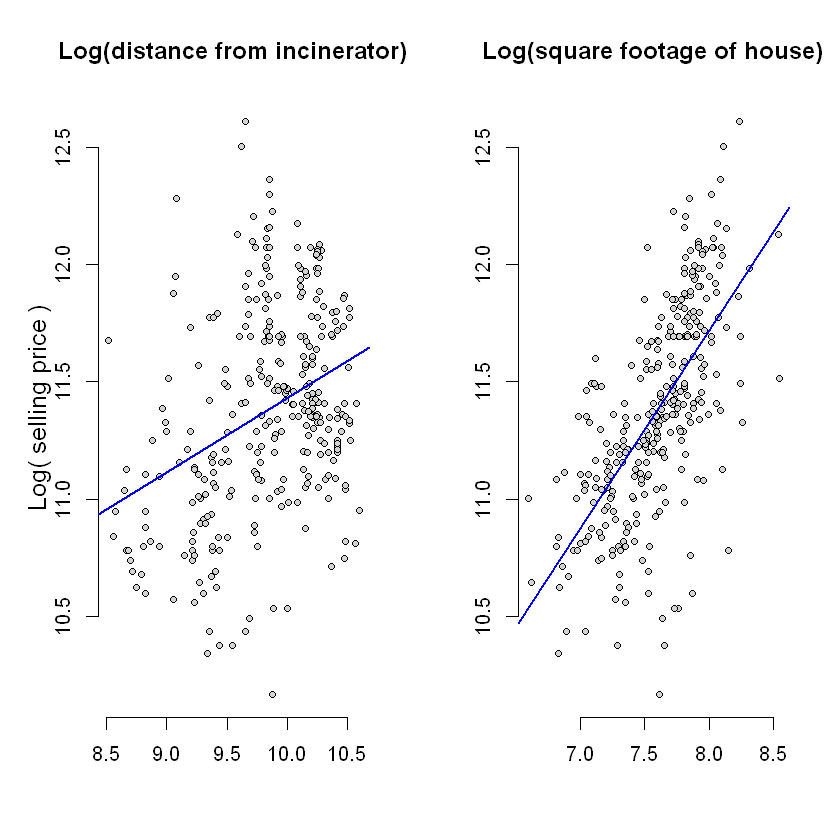

In [13]:
#Graphing illustrates the larger coefficient for area.

par(mfrow=c(1,2))

point_size <- 0.80

plot(y = hprice3$lprice, x = hprice3$ldist, frame = FALSE, 
main = "Log(distance from incinerator)", ylab = "", xlab="", 
pch = 21, bg = "lightgrey", cex=point_size)
mtext(side=2, line=2, "Log( selling price )", cex=1.25)
abline(lm(lprice ~ ldist, data=hprice3), col = "blue", lwd=2)

plot(y = hprice3$lprice, x = hprice3$larea, frame = FALSE, main = "Log(square footage of house)", ylab = " ", xlab="", pch = 21, bg = "lightgrey", cex=point_size)
abline(lm(lprice ~ larea, data=hprice3), col = "blue", lwd=2)

## Ch05C6

T test statistic asymptotically valid even without the MLR.6 normality assumption

In [2]:
data(econmath)

In [3]:
(score_max_min <- econmath %>% summarize(min_score = min(score, na.rm = TRUE),
                                       max_score = max(score, na.rm = TRUE)) %>% 
                              round(digits =2))      


min_score,max_score
19.53,98.44


In [4]:
help(econmath)

$$H_0: \beta_3 = 0$$

In [6]:
econmath_m1 = lm(score~colgpa+actmth+acteng,data = econmath) 

In [7]:
summary(econmath_m1)


Call:
lm(formula = score ~ colgpa + actmth + acteng, data = econmath)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.855  -6.215   0.444   6.812  32.670 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 16.17402    2.80044   5.776 1.09e-08 ***
colgpa      12.36620    0.71506  17.294  < 2e-16 ***
actmth       0.88335    0.11220   7.873 1.11e-14 ***
acteng       0.05176    0.11106   0.466    0.641    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.35 on 810 degrees of freedom
  (42 observations deleted due to missingness)
Multiple R-squared:  0.3972,	Adjusted R-squared:  0.395 
F-statistic: 177.9 on 3 and 810 DF,  p-value: < 2.2e-16


In [8]:
summ(econmath_m1)

MODEL INFO:
Observations: 814 (42 missing obs. deleted)
Dependent Variable: score
Type: OLS linear regression 

MODEL FIT:
F(3,810) = 177.94, p = 0.00
R² = 0.40
Adj. R² = 0.40 

Standard errors: OLS
------------------------------------------------
                     Est.   S.E.   t val.      p
----------------- ------- ------ -------- ------
(Intercept)         16.17   2.80     5.78   0.00
colgpa              12.37   0.72    17.29   0.00
actmth               0.88   0.11     7.87   0.00
acteng               0.05   0.11     0.47   0.64
------------------------------------------------

In [9]:
b3_test <- FSA::hoCoef(econmath_m1, term = 4,
                      bo= 0, "two.sided")

In [11]:
(b3_test)

,term,Ho Value,Estimate,Std. Error,T,df,p value
,4,0,0.05176405,0.1110631,0.4660776,810,0.6412852


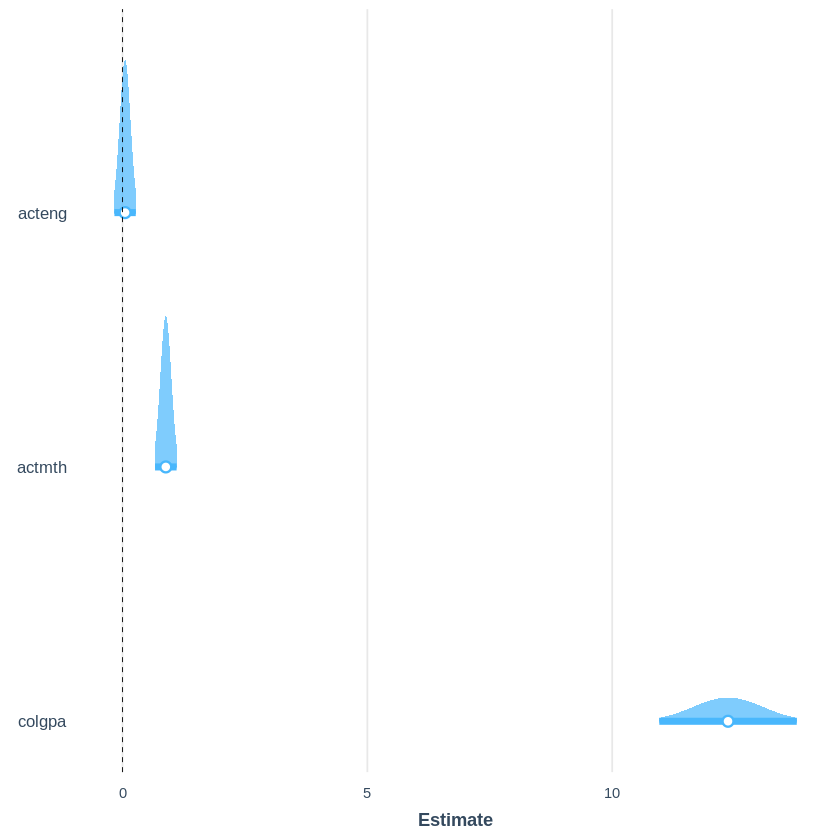

In [12]:
jtools::plot_coefs(econmath_m1, scale = TRUE, plot.distributions = TRUE, inner_ci_level = .95)

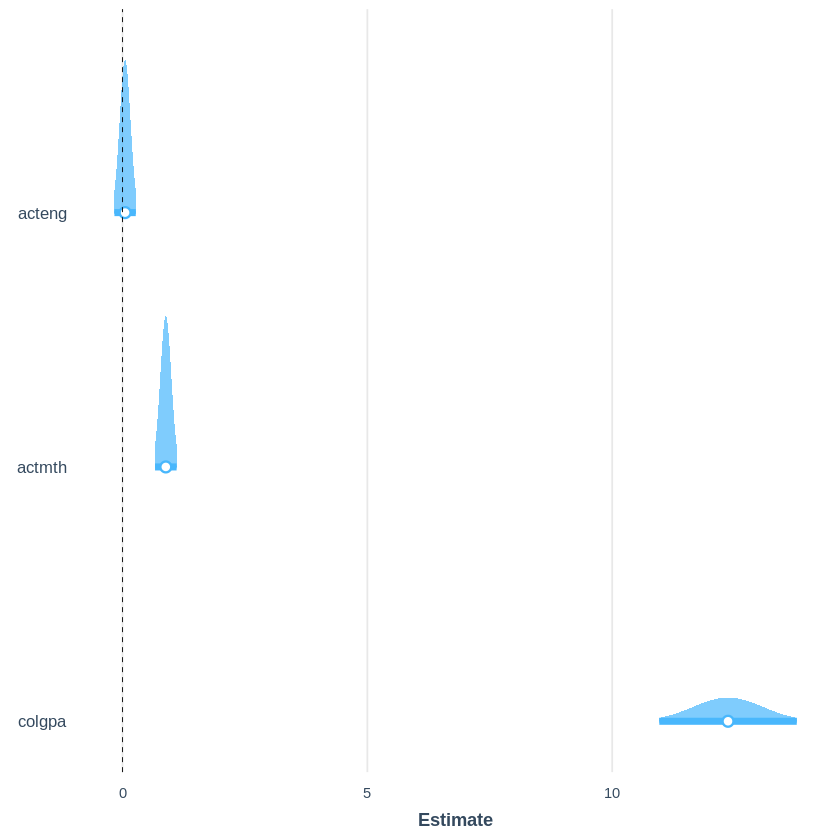

In [14]:
jtools::plot_coefs(econmath_m1, scale = FALSE, plot.distributions = TRUE, inner_ci_level = .95)

In [15]:
stargazer(type = "text",econmath_m1,  single.row = TRUE, header = FALSE, digits=5)


                        Dependent variable:    
                    ---------------------------
                               score           
-----------------------------------------------
colgpa                 12.36620*** (0.71506)   
actmth                 0.88335*** (0.11220)    
acteng                   0.05176 (0.11106)     
Constant               16.17402*** (2.80044)   
-----------------------------------------------
Observations                    814            
R2                            0.39723          
Adjusted R2                   0.39500          
Residual Std. Error     10.34845 (df = 810)    
F Statistic         177.93560*** (df = 3; 810) 
Note:               *p<0.1; **p<0.05; ***p<0.01


In [16]:
stargazer(type = "text",econmath_m1,  single.row = TRUE, header = TRUE, digits=3)


                        Dependent variable:    
                    ---------------------------
                               score           
-----------------------------------------------
colgpa                   12.366*** (0.715)     
actmth                   0.883*** (0.112)      
acteng                     0.052 (0.111)       
Constant                 16.174*** (2.800)     
-----------------------------------------------
Observations                    814            
R2                             0.397           
Adjusted R2                    0.395           
Residual Std. Error      10.348 (df = 810)     
F Statistic          177.936*** (df = 3; 810)  
Note:               *p<0.1; **p<0.05; ***p<0.01
